# Project 2020
<br>

#### Training regression models using Keras.  The author is Owen Coleman (G00387850@gmit.ie).
***

#### Overview

In this notebook you will find the two regression models that were used in the powerprod web service. These models were creating and trained using machine learning. I have also included explanations and some analysis of the accuracy of each of the models. 

#### Imports
Lets first import all the required libraries and configure our display options.

In [90]:
import numpy as np
import tensorflow.keras as kr
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [14, 8]

#### Powerproduction Dataset

Lets read the dataset into a pandas dataframe and display it with matplotlib. Before we do this we must first clean the dataset, removing a few instances where power values were recorded as zero toward the end of the dataset. 

The plot below shows our data with speed on the x axis and power on the y axis. We can see that it takes a particular amount of wind speed to activate any sort of real power generation from the turbines, from which point power geneation grows dramatically  with wind speed increase before leveling off at about 100KW/h.

In [52]:
df = pd.read_csv("powerproduction.csv")

In [53]:
#Remove the unreasonable power values
zeroVals = df[(df["speed"] > 10) & (df["power"] == 0)].index
df.drop(zeroVals, inplace=True)

Text(0, 0.5, 'Power Output')

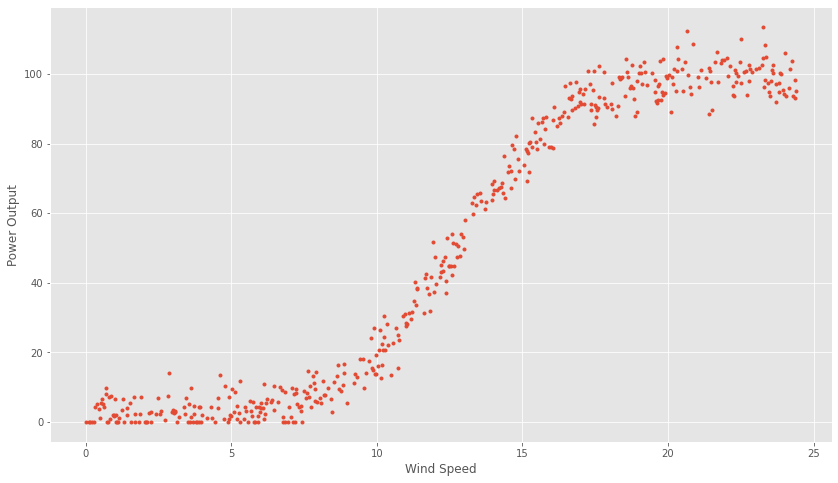

In [56]:
plt.plot(df["speed"], df["power"], '.')
# Add axis labels and a legend.
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')

In [5]:
#storing speed and power in xy numpy arrays for ease of access.
x = np.array(df["speed"])
y = np.array(df["power"])

<br>

#### Linear Regression Model

We will be writing our regression models using the Keras python library. Keras is an open source software library that acts as an interface for the TensorFlow library, and overall makes machine learning much easier for beginners.

[insert more]
[sequential model, dense layer, compiler]

In [197]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [198]:
# Train the neural network on our training data.
history = model.fit(x, y, epochs=1500)

Epoch 1/1500
16/16 [==============================] - 0s 533us/step - loss: 2561.9290
Epoch 2/1500
16/16 [==============================] - 0s 667us/step - loss: 2648.6193
Epoch 3/1500
16/16 [==============================] - 0s 667us/step - loss: 2343.6335
Epoch 4/1500
16/16 [==============================] - 0s 600us/step - loss: 2509.6005
Epoch 5/1500
16/16 [==============================] - 0s 533us/step - loss: 2552.8598
Epoch 6/1500
16/16 [==============================] - 0s 667us/step - loss: 2431.6298
Epoch 7/1500
16/16 [==============================] - 0s 600us/step - loss: 2363.9731
Epoch 8/1500
16/16 [==============================] - 0s 600us/step - loss: 2338.8593
Epoch 9/1500
16/16 [==============================] - 0s 733us/step - loss: 2305.9378
Epoch 10/1500
16/16 [==============================] - 0s 600us/step - loss: 2307.3221
Epoch 11/1500
16/16 [==============================] - 0s 600us/step - loss: 2352.4677
Epoch 12/1500
16/16 [==============================]

16/16 [==============================] - 0s 667us/step - loss: 1047.9249
Epoch 95/1500
16/16 [==============================] - 0s 533us/step - loss: 1071.4616
Epoch 96/1500
16/16 [==============================] - 0s 467us/step - loss: 1002.7516
Epoch 97/1500
16/16 [==============================] - 0s 600us/step - loss: 1039.3271
Epoch 98/1500
16/16 [==============================] - 0s 600us/step - loss: 970.8554
Epoch 99/1500
16/16 [==============================] - 0s 533us/step - loss: 1007.5931
Epoch 100/1500
16/16 [==============================] - 0s 600us/step - loss: 993.7526
Epoch 101/1500
16/16 [==============================] - 0s 600us/step - loss: 996.2846
Epoch 102/1500
16/16 [==============================] - 0s 533us/step - loss: 912.5290
Epoch 103/1500
16/16 [==============================] - 0s 600us/step - loss: 978.5343
Epoch 104/1500
16/16 [==============================] - 0s 534us/step - loss: 977.3396
Epoch 105/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 600us/step - loss: 454.3614
Epoch 189/1500
16/16 [==============================] - 0s 600us/step - loss: 451.5429
Epoch 190/1500
16/16 [==============================] - 0s 600us/step - loss: 468.5406
Epoch 191/1500
16/16 [==============================] - 0s 600us/step - loss: 466.1698
Epoch 192/1500
16/16 [==============================] - 0s 600us/step - loss: 434.5855
Epoch 193/1500
16/16 [==============================] - 0s 533us/step - loss: 435.5657
Epoch 194/1500
16/16 [==============================] - 0s 600us/step - loss: 435.8745
Epoch 195/1500
16/16 [==============================] - 0s 600us/step - loss: 442.8328
Epoch 196/1500
16/16 [==============================] - 0s 600us/step - loss: 426.1007
Epoch 197/1500
16/16 [==============================] - 0s 600us/step - loss: 431.1725
Epoch 198/1500
16/16 [==============================] - 0s 533us/step - loss: 430.7665
Epoch 199/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 533us/step - loss: 294.4753
Epoch 283/1500
16/16 [==============================] - 0s 600us/step - loss: 291.1733
Epoch 284/1500
16/16 [==============================] - 0s 600us/step - loss: 287.5809
Epoch 285/1500
16/16 [==============================] - 0s 533us/step - loss: 308.4321
Epoch 286/1500
16/16 [==============================] - 0s 533us/step - loss: 280.6655
Epoch 287/1500
16/16 [==============================] - 0s 533us/step - loss: 294.4555
Epoch 288/1500
16/16 [==============================] - 0s 533us/step - loss: 288.1589
Epoch 289/1500
16/16 [==============================] - 0s 600us/step - loss: 301.6299
Epoch 290/1500
16/16 [==============================] - 0s 600us/step - loss: 310.6267
Epoch 291/1500
16/16 [==============================] - 0s 600us/step - loss: 295.1552
Epoch 292/1500
16/16 [==============================] - 0s 533us/step - loss: 290.3715
Epoch 293/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 600us/step - loss: 279.0480
Epoch 376/1500
16/16 [==============================] - 0s 733us/step - loss: 273.2666
Epoch 377/1500
16/16 [==============================] - 0s 800us/step - loss: 274.5871
Epoch 378/1500
16/16 [==============================] - 0s 733us/step - loss: 251.5986
Epoch 379/1500
16/16 [==============================] - 0s 733us/step - loss: 283.9194
Epoch 380/1500
16/16 [==============================] - 0s 733us/step - loss: 263.1486
Epoch 381/1500
16/16 [==============================] - 0s 733us/step - loss: 265.5498
Epoch 382/1500
16/16 [==============================] - 0s 733us/step - loss: 266.0529
Epoch 383/1500
16/16 [==============================] - 0s 666us/step - loss: 273.9882
Epoch 384/1500
16/16 [==============================] - ETA: 0s - loss: 306.723 - 0s 667us/step - loss: 267.7657
Epoch 385/1500
16/16 [==============================] - 0s 733us/step - loss: 269.2136
Epoch 386/1500
16/16 [==========

16/16 [==============================] - 0s 467us/step - loss: 263.6526
Epoch 470/1500
16/16 [==============================] - 0s 567us/step - loss: 257.4398
Epoch 471/1500
16/16 [==============================] - 0s 600us/step - loss: 262.9145
Epoch 472/1500
16/16 [==============================] - 0s 600us/step - loss: 245.8777
Epoch 473/1500
16/16 [==============================] - 0s 667us/step - loss: 250.1456
Epoch 474/1500
16/16 [==============================] - 0s 600us/step - loss: 266.6502
Epoch 475/1500
16/16 [==============================] - 0s 533us/step - loss: 272.1770
Epoch 476/1500
16/16 [==============================] - 0s 600us/step - loss: 264.5126
Epoch 477/1500
16/16 [==============================] - 0s 600us/step - loss: 260.5754
Epoch 478/1500
16/16 [==============================] - 0s 600us/step - loss: 261.2554
Epoch 479/1500
16/16 [==============================] - 0s 667us/step - loss: 250.3624
Epoch 480/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 600us/step - loss: 246.0784
Epoch 564/1500
16/16 [==============================] - 0s 533us/step - loss: 241.7185
Epoch 565/1500
16/16 [==============================] - 0s 733us/step - loss: 237.4245
Epoch 566/1500
16/16 [==============================] - 0s 733us/step - loss: 248.8069
Epoch 567/1500
16/16 [==============================] - 0s 533us/step - loss: 242.3704
Epoch 568/1500
16/16 [==============================] - 0s 600us/step - loss: 248.9637
Epoch 569/1500
16/16 [==============================] - 0s 600us/step - loss: 242.1559
Epoch 570/1500
16/16 [==============================] - 0s 533us/step - loss: 243.8984
Epoch 571/1500
16/16 [==============================] - 0s 667us/step - loss: 244.1566
Epoch 572/1500
16/16 [==============================] - 0s 600us/step - loss: 240.8008
Epoch 573/1500
16/16 [==============================] - 0s 600us/step - loss: 242.4187
Epoch 574/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 600us/step - loss: 238.6367
Epoch 658/1500
16/16 [==============================] - 0s 600us/step - loss: 240.0873
Epoch 659/1500
16/16 [==============================] - 0s 600us/step - loss: 242.3833
Epoch 660/1500
16/16 [==============================] - 0s 533us/step - loss: 235.3470
Epoch 661/1500
16/16 [==============================] - 0s 533us/step - loss: 225.0254
Epoch 662/1500
16/16 [==============================] - 0s 600us/step - loss: 224.6945
Epoch 663/1500
16/16 [==============================] - 0s 533us/step - loss: 222.8251
Epoch 664/1500
16/16 [==============================] - 0s 667us/step - loss: 216.9693
Epoch 665/1500
16/16 [==============================] - 0s 600us/step - loss: 242.7653
Epoch 666/1500
16/16 [==============================] - 0s 600us/step - loss: 244.1617
Epoch 667/1500
16/16 [==============================] - 0s 600us/step - loss: 240.8532
Epoch 668/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 600us/step - loss: 215.9881
Epoch 752/1500
16/16 [==============================] - 0s 600us/step - loss: 218.5177
Epoch 753/1500
16/16 [==============================] - 0s 600us/step - loss: 222.9213
Epoch 754/1500
16/16 [==============================] - 0s 600us/step - loss: 221.7647
Epoch 755/1500
16/16 [==============================] - 0s 533us/step - loss: 222.1141
Epoch 756/1500
16/16 [==============================] - 0s 667us/step - loss: 229.2721
Epoch 757/1500
16/16 [==============================] - 0s 600us/step - loss: 222.3450
Epoch 758/1500
16/16 [==============================] - 0s 533us/step - loss: 216.7893
Epoch 759/1500
16/16 [==============================] - 0s 600us/step - loss: 227.0183
Epoch 760/1500
16/16 [==============================] - 0s 600us/step - loss: 224.4362
Epoch 761/1500
16/16 [==============================] - 0s 600us/step - loss: 223.1344
Epoch 762/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 600us/step - loss: 222.5358
Epoch 846/1500
16/16 [==============================] - 0s 533us/step - loss: 218.7494
Epoch 847/1500
16/16 [==============================] - 0s 600us/step - loss: 214.2016
Epoch 848/1500
16/16 [==============================] - 0s 667us/step - loss: 221.4375
Epoch 849/1500
16/16 [==============================] - 0s 667us/step - loss: 204.6491
Epoch 850/1500
16/16 [==============================] - 0s 533us/step - loss: 203.1967
Epoch 851/1500
16/16 [==============================] - 0s 600us/step - loss: 218.1198
Epoch 852/1500
16/16 [==============================] - 0s 600us/step - loss: 221.1897
Epoch 853/1500
16/16 [==============================] - 0s 533us/step - loss: 229.6561
Epoch 854/1500
16/16 [==============================] - 0s 600us/step - loss: 225.9577
Epoch 855/1500
16/16 [==============================] - 0s 600us/step - loss: 228.1571
Epoch 856/1500
16/16 [==============================] - ET

16/16 [==============================] - 0s 733us/step - loss: 189.5205
Epoch 940/1500
16/16 [==============================] - 0s 600us/step - loss: 212.9229
Epoch 941/1500
16/16 [==============================] - 0s 733us/step - loss: 192.5018
Epoch 942/1500
16/16 [==============================] - 0s 533us/step - loss: 213.5845
Epoch 943/1500
16/16 [==============================] - 0s 533us/step - loss: 209.0364
Epoch 944/1500
16/16 [==============================] - 0s 533us/step - loss: 210.3446
Epoch 945/1500
16/16 [==============================] - 0s 533us/step - loss: 220.5689
Epoch 946/1500
16/16 [==============================] - 0s 667us/step - loss: 224.4015
Epoch 947/1500
16/16 [==============================] - 0s 600us/step - loss: 211.1967
Epoch 948/1500
16/16 [==============================] - 0s 600us/step - loss: 200.9987
Epoch 949/1500
16/16 [==============================] - 0s 467us/step - loss: 223.6994
Epoch 950/1500
16/16 [==============================] - 0s

Epoch 1033/1500
16/16 [==============================] - 0s 600us/step - loss: 201.5480
Epoch 1034/1500
16/16 [==============================] - 0s 533us/step - loss: 203.3240
Epoch 1035/1500
16/16 [==============================] - 0s 600us/step - loss: 197.3680
Epoch 1036/1500
16/16 [==============================] - 0s 867us/step - loss: 207.2038
Epoch 1037/1500
16/16 [==============================] - 0s 895us/step - loss: 196.8373
Epoch 1038/1500
16/16 [==============================] - 0s 800us/step - loss: 193.7567
Epoch 1039/1500
16/16 [==============================] - 0s 733us/step - loss: 201.7029
Epoch 1040/1500
16/16 [==============================] - 0s 933us/step - loss: 185.4441
Epoch 1041/1500
16/16 [==============================] - 0s 800us/step - loss: 213.3001
Epoch 1042/1500
16/16 [==============================] - 0s 934us/step - loss: 202.0642
Epoch 1043/1500
16/16 [==============================] - 0s 933us/step - loss: 205.2137
Epoch 1044/1500
16/16 [=========

16/16 [==============================] - 0s 600us/step - loss: 201.3978
Epoch 1127/1500
16/16 [==============================] - 0s 533us/step - loss: 185.5177
Epoch 1128/1500
16/16 [==============================] - 0s 533us/step - loss: 212.9820
Epoch 1129/1500
16/16 [==============================] - 0s 533us/step - loss: 207.9021
Epoch 1130/1500
16/16 [==============================] - 0s 600us/step - loss: 187.6769
Epoch 1131/1500
16/16 [==============================] - 0s 600us/step - loss: 199.8930
Epoch 1132/1500
16/16 [==============================] - 0s 600us/step - loss: 200.3950
Epoch 1133/1500
16/16 [==============================] - 0s 533us/step - loss: 187.6451
Epoch 1134/1500
16/16 [==============================] - 0s 533us/step - loss: 197.4328
Epoch 1135/1500
16/16 [==============================] - 0s 533us/step - loss: 207.8311
Epoch 1136/1500
16/16 [==============================] - 0s 533us/step - loss: 186.4726
Epoch 1137/1500
16/16 [=========================

16/16 [==============================] - 0s 667us/step - loss: 196.9519
Epoch 1220/1500
16/16 [==============================] - 0s 600us/step - loss: 178.5924
Epoch 1221/1500
16/16 [==============================] - 0s 600us/step - loss: 197.3563
Epoch 1222/1500
16/16 [==============================] - 0s 533us/step - loss: 192.4442
Epoch 1223/1500
16/16 [==============================] - 0s 600us/step - loss: 181.8196
Epoch 1224/1500
16/16 [==============================] - 0s 733us/step - loss: 195.2979
Epoch 1225/1500
16/16 [==============================] - 0s 533us/step - loss: 183.9030
Epoch 1226/1500
16/16 [==============================] - 0s 600us/step - loss: 200.8338
Epoch 1227/1500
16/16 [==============================] - 0s 533us/step - loss: 192.8539
Epoch 1228/1500
16/16 [==============================] - 0s 600us/step - loss: 190.7544
Epoch 1229/1500
16/16 [==============================] - 0s 667us/step - loss: 188.8525
Epoch 1230/1500
16/16 [=========================

16/16 [==============================] - 0s 600us/step - loss: 197.0386
Epoch 1313/1500
16/16 [==============================] - 0s 600us/step - loss: 200.4207
Epoch 1314/1500
16/16 [==============================] - 0s 600us/step - loss: 180.3051
Epoch 1315/1500
16/16 [==============================] - 0s 667us/step - loss: 191.8926
Epoch 1316/1500
16/16 [==============================] - 0s 533us/step - loss: 177.0668
Epoch 1317/1500
16/16 [==============================] - 0s 533us/step - loss: 180.3027
Epoch 1318/1500
16/16 [==============================] - 0s 533us/step - loss: 189.3572
Epoch 1319/1500
16/16 [==============================] - 0s 533us/step - loss: 190.6403
Epoch 1320/1500
16/16 [==============================] - 0s 667us/step - loss: 186.6875
Epoch 1321/1500
16/16 [==============================] - 0s 533us/step - loss: 180.1064
Epoch 1322/1500
16/16 [==============================] - 0s 600us/step - loss: 187.3903
Epoch 1323/1500
16/16 [=========================

16/16 [==============================] - 0s 600us/step - loss: 195.1983
Epoch 1406/1500
16/16 [==============================] - 0s 600us/step - loss: 181.9230
Epoch 1407/1500
16/16 [==============================] - 0s 800us/step - loss: 184.2174
Epoch 1408/1500
16/16 [==============================] - 0s 733us/step - loss: 183.7595
Epoch 1409/1500
16/16 [==============================] - 0s 533us/step - loss: 191.9555
Epoch 1410/1500
16/16 [==============================] - 0s 533us/step - loss: 178.9598
Epoch 1411/1500
16/16 [==============================] - 0s 533us/step - loss: 178.1946
Epoch 1412/1500
16/16 [==============================] - 0s 600us/step - loss: 178.4486
Epoch 1413/1500
16/16 [==============================] - 0s 600us/step - loss: 174.2156
Epoch 1414/1500
16/16 [==============================] - 0s 600us/step - loss: 175.3822
Epoch 1415/1500
16/16 [==============================] - 0s 533us/step - loss: 164.0940
Epoch 1416/1500
16/16 [=========================

16/16 [==============================] - 0s 600us/step - loss: 193.2834
Epoch 1499/1500
16/16 [==============================] - 0s 533us/step - loss: 182.7463
Epoch 1500/1500
16/16 [==============================] - 0s 600us/step - loss: 187.7351


[ANalysis]

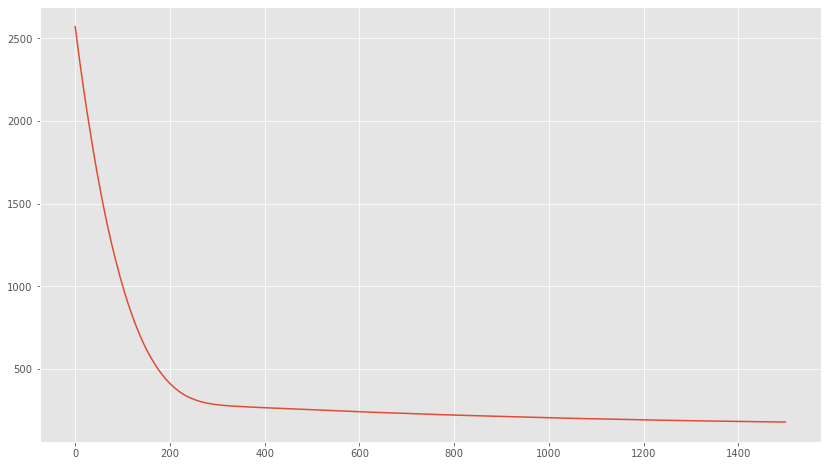

In [199]:
plt.plot(history.history['loss'])

In [9]:
df.loc[20]

speed    0.926
power    1.996
Name: 20, dtype: float64

In [195]:
model.predict([0])

array([[-18.609127]], dtype=float32)

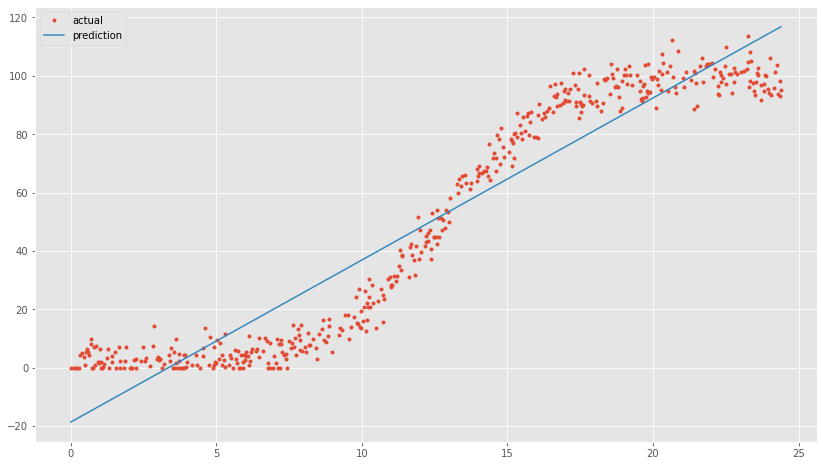

In [196]:
plt.plot(x, y, '.',label='actual' )
plt.plot(x, model.predict(x), label='prediction')
plt.legend();


In [12]:
# Evaluate the neural network on the test data.
model.evaluate(x, y)

16/16 [==============================] - 0s 1ms/step - loss: 180.7696


180.7695770263672

In [13]:
 model.get_weights()

[array([[5.083074]], dtype=float32), array([-11.330781], dtype=float32)]

In [200]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [201]:
# Fit the data.
model.fit(x, y, epochs=500, batch_size=5)

Epoch 1/500
98/98 [==============================] - 0s 419us/step - loss: 3976.7844
Epoch 2/500
98/98 [==============================] - 0s 475us/step - loss: 3465.5400
Epoch 3/500
98/98 [==============================] - 0s 462us/step - loss: 3052.1874
Epoch 4/500
98/98 [==============================] - 0s 546us/step - loss: 3011.5688
Epoch 5/500
98/98 [==============================] - 0s 546us/step - loss: 2578.1604
Epoch 6/500
98/98 [==============================] - 0s 567us/step - loss: 2415.9200
Epoch 7/500
98/98 [==============================] - 0s 515us/step - loss: 2223.0917
Epoch 8/500
98/98 [==============================] - 0s 433us/step - loss: 2140.9306
Epoch 9/500
98/98 [==============================] - 0s 454us/step - loss: 2068.2152
Epoch 10/500
98/98 [==============================] - 0s 423us/step - loss: 1871.9511
Epoch 11/500
98/98 [==============================] - 0s 474us/step - loss: 1652.2785
Epoch 12/500
98/98 [==============================] - 0s 474us/

98/98 [==============================] - 0s 443us/step - loss: 51.6403
Epoch 98/500
98/98 [==============================] - 0s 495us/step - loss: 49.8427
Epoch 99/500
98/98 [==============================] - 0s 495us/step - loss: 51.3266
Epoch 100/500
98/98 [==============================] - 0s 485us/step - loss: 50.9948
Epoch 101/500
98/98 [==============================] - 0s 495us/step - loss: 48.4535
Epoch 102/500
98/98 [==============================] - 0s 464us/step - loss: 49.9937
Epoch 103/500
98/98 [==============================] - 0s 289us/step - loss: 45.4968
Epoch 104/500
98/98 [==============================] - 0s 622us/step - loss: 50.1792
Epoch 105/500
98/98 [==============================] - 0s 474us/step - loss: 45.4526
Epoch 106/500
98/98 [==============================] - 0s 485us/step - loss: 40.7577
Epoch 107/500
98/98 [==============================] - 0s 495us/step - loss: 43.8728
Epoch 108/500
98/98 [==============================] - 0s 474us/step - loss: 45.3

98/98 [==============================] - 0s 474us/step - loss: 20.8006
Epoch 194/500
98/98 [==============================] - 0s 495us/step - loss: 22.2700
Epoch 195/500
98/98 [==============================] - 0s 474us/step - loss: 19.7463
Epoch 196/500
98/98 [==============================] - 0s 474us/step - loss: 22.9399
Epoch 197/500
98/98 [==============================] - 0s 443us/step - loss: 20.1467
Epoch 198/500
98/98 [==============================] - 0s 423us/step - loss: 21.9441
Epoch 199/500
98/98 [==============================] - 0s 464us/step - loss: 21.5570
Epoch 200/500
98/98 [==============================] - 0s 454us/step - loss: 19.6802
Epoch 201/500
98/98 [==============================] - 0s 495us/step - loss: 18.0292
Epoch 202/500
98/98 [==============================] - 0s 495us/step - loss: 21.0824
Epoch 203/500
98/98 [==============================] - 0s 495us/step - loss: 19.2383
Epoch 204/500
98/98 [==============================] - 0s 485us/step - loss: 21

98/98 [==============================] - 0s 505us/step - loss: 17.6591
Epoch 290/500
98/98 [==============================] - 0s 495us/step - loss: 17.4751
Epoch 291/500
98/98 [==============================] - 0s 485us/step - loss: 17.8986
Epoch 292/500
98/98 [==============================] - 0s 485us/step - loss: 19.8462
Epoch 293/500
98/98 [==============================] - 0s 320us/step - loss: 18.3788
Epoch 294/500
98/98 [==============================] - 0s 421us/step - loss: 17.8618
Epoch 295/500
98/98 [==============================] - 0s 678us/step - loss: 17.9571
Epoch 296/500
98/98 [==============================] - 0s 495us/step - loss: 17.3125
Epoch 297/500
98/98 [==============================] - 0s 495us/step - loss: 18.0853
Epoch 298/500
98/98 [==============================] - 0s 485us/step - loss: 16.9570
Epoch 299/500
98/98 [==============================] - 0s 474us/step - loss: 15.8678
Epoch 300/500
98/98 [==============================] - 0s 299us/step - loss: 19

98/98 [==============================] - 0s 605us/step - loss: 16.4722
Epoch 386/500
98/98 [==============================] - 0s 395us/step - loss: 17.5684
Epoch 387/500
98/98 [==============================] - 0s 340us/step - loss: 15.5280
Epoch 388/500
98/98 [==============================] - 0s 637us/step - loss: 15.7686
Epoch 389/500
98/98 [==============================] - 0s 423us/step - loss: 17.5837
Epoch 390/500
98/98 [==============================] - 0s 433us/step - loss: 16.6682
Epoch 391/500
98/98 [==============================] - 0s 433us/step - loss: 18.2436
Epoch 392/500
98/98 [==============================] - 0s 433us/step - loss: 16.6988
Epoch 393/500
98/98 [==============================] - 0s 464us/step - loss: 17.4027
Epoch 394/500
98/98 [==============================] - 0s 505us/step - loss: 15.7738
Epoch 395/500
98/98 [==============================] - 0s 485us/step - loss: 18.6106
Epoch 396/500
98/98 [==============================] - 0s 474us/step - loss: 16

98/98 [==============================] - 0s 585us/step - loss: 16.8488
Epoch 482/500
98/98 [==============================] - 0s 526us/step - loss: 18.3676
Epoch 483/500
98/98 [==============================] - 0s 505us/step - loss: 17.8385
Epoch 484/500
98/98 [==============================] - 0s 505us/step - loss: 17.8668
Epoch 485/500
98/98 [==============================] - 0s 454us/step - loss: 16.7875
Epoch 486/500
98/98 [==============================] - 0s 359us/step - loss: 16.2963
Epoch 487/500
98/98 [==============================] - 0s 417us/step - loss: 16.6485
Epoch 488/500
98/98 [==============================] - 0s 427us/step - loss: 17.8635
Epoch 489/500
98/98 [==============================] - 0s 432us/step - loss: 16.4620
Epoch 490/500
98/98 [==============================] - 0s 336us/step - loss: 17.3940
Epoch 491/500
98/98 [==============================] - 0s 438us/step - loss: 19.4179
Epoch 492/500
98/98 [==============================] - 0s 588us/step - loss: 17

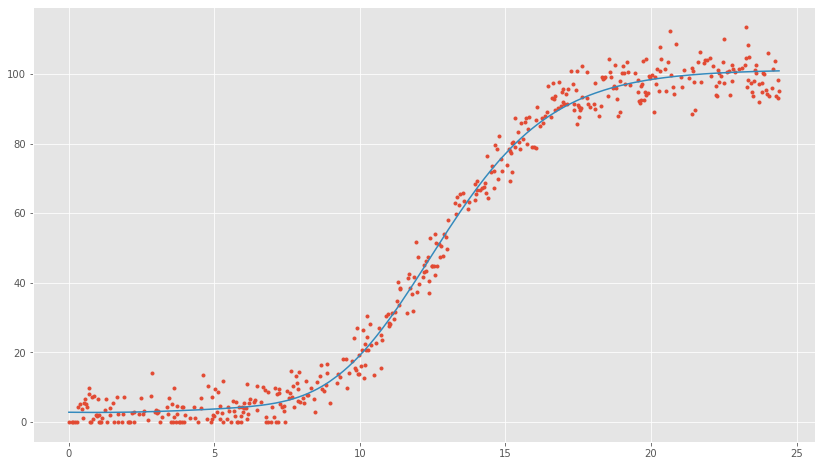

In [202]:
plt.plot(x,y,'.')
plt.plot(x, model.predict(x))

In [204]:
model.predict([199])

array([[101.263565]], dtype=float32)